In [16]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
for filename in os.listdir():
    if os.path.isfile(filename) and filename.endswith(".pth"):
        print(filename)

Robot_8.pth
Robot_1.pth
Robot_6.pth
Robot_3.pth
Robot_5.pth
Robot_2.pth
Robot_4.pth
Robot_0.pth
Robot_7.pth
Robot_9.pth


In [18]:
data = {}
for filename in os.listdir():
    if os.path.isfile(filename) and filename.endswith(".pth"):
        data[filename.replace(".pth","")] = np.loadtxt(filename)

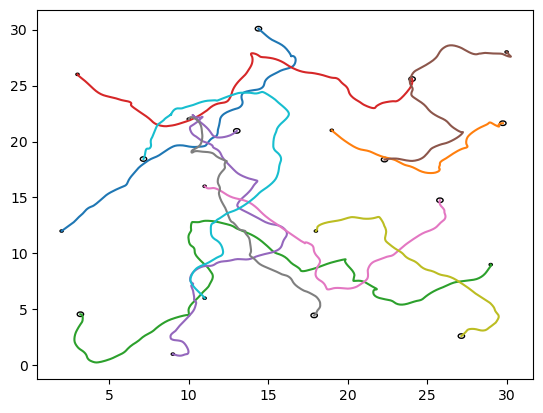

In [19]:
fig = plt.figure()
ax = fig.gca()
for robot in data:
    ax.plot(data[robot][:,0], data[robot][:,1], '-')
    ax.add_patch(plt.Circle((data[robot][0,0], data[robot][0,1]), 0.1, fill=False))
    ax.add_patch(plt.Circle((data[robot][-1,0], data[robot][-1,1]), 0.2, fill=False))
plt.show()

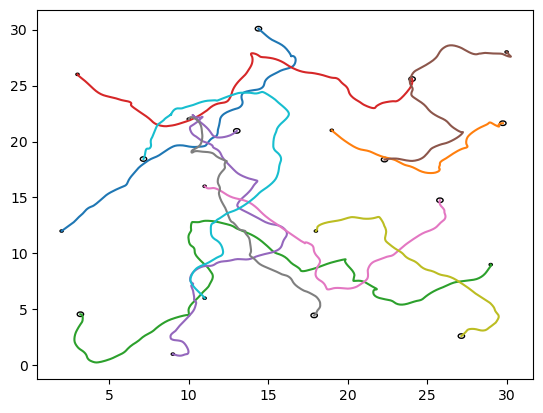

In [20]:
fig = plt.figure()
ax = fig.gca()
max_frame_count = 0
lines = {}
for robot in data:
    max_frame_count = max(max_frame_count, len(data[robot]))
    lines[robot] = ax.plot(data[robot][:,0], data[robot][:,1], '-')[0]
    ax.add_patch(plt.Circle((data[robot][0,0], data[robot][0,1]), 0.1, fill=False))
    ax.add_patch(plt.Circle((data[robot][-1,0], data[robot][-1,1]), 0.2, fill=False))
plt.show()

def update(frame):
    # for each frame, update the data stored on each artist
    for robot in data:
        if frame <= len(data[robot]):
            lines[robot].set_xdata(data[robot][:frame,0])
            lines[robot].set_ydata(data[robot][:frame,1])
    return lines

ani = animation.FuncAnimation(fig=fig, func=update, frames=max_frame_count, interval = 30)
plt.show()
ani.save(filename="paths.mp4", writer="ffmpeg")